In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
Suicide = pd.read_csv('Suicide_Detection.csv')
Suicide.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [4]:
Suicide = Suicide.drop('Unnamed: 0',axis=1)
Suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [13]:
Suicide['Length'] = Suicide['text'].apply(lambda x: len(x.split(' ')))
Suicide['Length'].describe()

count    232074.000000
mean        131.546438
std         222.081581
min           1.000000
25%          26.000000
50%          60.000000
75%         154.000000
max       15632.000000
Name: Length, dtype: float64

In [14]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    print(Suicide['Length'].quantile(i))

15.0
22.0
30.0
42.0
60.0
86.0
126.0
190.0
317.0


In [15]:
for i in [0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]:
    print(Suicide['Length'].quantile(i))

339.0
363.0
393.0
427.0
470.0
526.0
604.0
721.0
960.0


In [16]:
Suicide = Suicide[Suicide.Length<=317]

In [18]:
Suicide

,text,class,Length
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,143
1,Am I weird I don't get affected by compliments...,non-suicide,27
2,Finally 2020 is almost over... So I can never ...,non-suicide,26
3,i need helpjust help me im crying so hard,suicide,9
5,Honetly idkI dont know what im even doing here...,suicide,289
...,...,...,...
232068,I did something today I went sledding with my ...,non-suicide,38
232069,If you don't like rock then your not going to ...,non-suicide,19
232070,You how you can tell i have so many friends an...,non-suicide,31
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide,14


In [19]:
Words = list()
for i in Suicide['text']:
    for j in i.split(' '):
        Words.append(j.upper())
len(Words)

16688702

There are 30,528,508 w

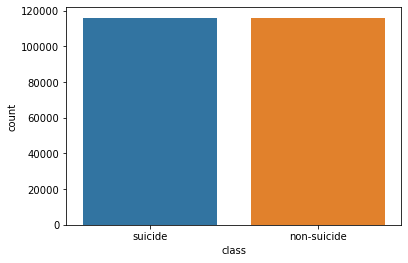

In [5]:
sns.countplot(Suicide['class'])
plt.show()

In [20]:
from collections import Counter


In [42]:
Words_Freq = Counter(Words)
Words_Freq = pd.DataFrame({'Word':list(Words_Freq.keys()),'Frequency':list(Words_Freq.values())})
Words_Freq.sort_values('Frequency',ascending=False,inplace=True)
Words_Freq.head(70)

,Word,Frequency
4,I,890895
18,TO,558762
16,AND,464789
90,THE,350903
30,A,339305
...,...,...
404,CAN'T,35968
296,HAD,35618
460,DON’T,35336
1328,I'VE,35261


In [43]:
Words_Freq = Words_Freq[Words_Freq['Frequency']>Words_Freq['Frequency'].quantile(0.9995)]
len(Words_Freq)

215

In [44]:
from tqdm.auto import tqdm
tqdm.pandas()

In [45]:
Final_Words = list(Words_Freq.Word)
for i in tqdm(Final_Words):
    Suicide[i] = Suicide['text'].apply(lambda x: 1 if i in x.upper().split(' ') else 0)
Suicide.drop('text',axis=1,inplace=True)
Suicide.head()

,class,Length,I,TO,AND,THE,A,MY,OF,IT,...,POST,MOST,THINKING,ACTUALLY,MANY,SUICIDAL,DOWN,WANTED,ELSE,HAPPY
0,suicide,143,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,non-suicide,27,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,non-suicide,26,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,suicide,9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,suicide,289,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Suicide['class'] = Suicide['class'].apply(lambda x: 1 if x == 'suicide' else 0)
Suicide.head()